<a href="https://colab.research.google.com/github/VrajPatel18011/202418011/blob/main/Project_Feature_Finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Scraping

Dataset Source: Kaggle - Car Datasets

Instructions:

* Download the Datasets: Access the link below to view downloaded multiple car datasets from Kaggle profiles or notebooks.
* Combine into a Single DataFrame: Merge this downloaded datasets into a single unified DataFrame for comprehensive analysis.
* Folder Link: https://drive.google.com/drive/folders/1doeXd3GBMgcOps-7c6T9TySfpeEhdMnN?usp=drive_link
* Dataset Link: https://docs.google.com/spreadsheets/d/1JZMKihKLC6d2rYUxqCC1TcSwbD43ok9m/edit?usp=sharing&ouid=117077230225619083409&rtpof=true&sd=true

# Data Preprocessing





In [ ]:
# @title Data Cleaning and fill null values
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Project/car_dataset.xlsx')

df.columns
df['Car Make'] = df['Car Make'].str.replace('None', 'BMW', regex=False)
df['Car Model'] = df['Car Model'].str.replace('None','Prius', regex=False)
df['Maintenance History'] = df['Maintenance History'].str.replace('None','Engine oil change', regex=False)
df['Coverage Type'] = df['Coverage Type'].str.replace('None','Third-party', regex=False)
df['Location'] = df['Location'].str.replace('None','India', regex=False)
df['Vehicle Condition'] = df['Vehicle Condition'].str.replace('None','Excellent', regex=False)

# For converting Repair cost column from Object Datatype to Integer
'''
    df['Repair Costs'] = df['Repair Costs'].str.replace('$','',regex=False)
    df['Repair Costs'] = df['Repair Costs'].str.replace(',','',regex=False)
    df['Repair Costs'] = df['Repair Costs'].astype(int)
'''

# For rechecking the None or Null values
'''
    df.value_counts('None')
    for i in df.select_dtypes(include = object).columns:
        df[i] = df[i].str.lower()
    for i in df.columns:
        print(df[i].unique())
'''

# For applying necessary changes directly to the file
'''
# df.to_excel('/content/drive/MyDrive/Project/car_dataset.xlsx', index=False)
'''
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Car Make             10000 non-null  object
 1   Car Model            10000 non-null  object
 2   Year of Manufacture  10000 non-null  int64 
 3   Engine Size          10000 non-null  int64 
 4   Mileage              10000 non-null  int64 
 5   Maintenance History  10000 non-null  object
 6   Maintenance Cost     10000 non-null  int64 
 7   Repair Costs         10000 non-null  int64 
 8   Insurance Premium    10000 non-null  int64 
 9   Coverage Type        10000 non-null  object
 10  Location             10000 non-null  object
 11  Driver Age           10000 non-null  int64 
 12  Driver Experience    10000 non-null  int64 
 13  Safety Feature       10000 non-null  object
 14  Vehicle Condition    10000 non-null  object
dtypes: int64(8), object(7)
memory usage: 1.1+ MB


# Models for Regressions


*   Linear Regression
*   Ridge Regression
*   Lasso Regression



###Linear Regression

Validation Set Performance:
Mean squared error:  0.011934320037270456
Coefficient of determination:  0.9884799043332063
Mean absolute error:  0.08854484787758736
Root Mean Squared error :  0.10924431352372743
Test Set Performance:
Mean squared error:  0.011536038692391903
Coefficient of determination:  0.9885042434609435
Mean absolute error:  0.08671373129789768
Root Mean Squared error :  0.10740595277912628


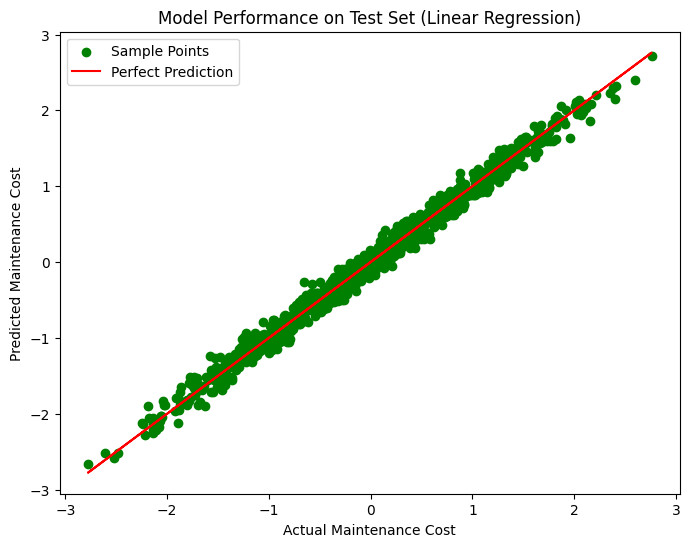

Maintenance Cost for car:  2526


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

# Load dataset
df = pd.read_excel("/content/drive/MyDrive/Project/car_dataset.xlsx")

# Define features and target variable
X = df.drop("Maintenance Cost", axis=1)
y = df['Maintenance Cost']

# Convert categorical features using LabelEncoder
le = LabelEncoder()
categorical_cols = X.select_dtypes(include='object').columns
X[categorical_cols] = X[categorical_cols].apply(le.fit_transform)

# Apply scaling to features and target variable
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = StandardScaler().fit_transform(y.values.reshape(-1, 1)).flatten()

# Create the pipeline with polynomial features, and model
pipeline = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=104, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=104, shuffle=True)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the validation and test sets
y_pred_val = pipeline.predict(X_val)
y_pred_test = pipeline.predict(X_test)

# Evaluate on validation set
print('Validation Set Performance:')
print('Mean squared error: ', mean_squared_error(y_val, y_pred_val))
print('Coefficient of determination: ', r2_score(y_val, y_pred_val))
print('Mean absolute error: ', mean_absolute_error(y_val, y_pred_val))
print('Root Mean Squared error : ', np.sqrt(mean_squared_error(y_val, y_pred_val)))

# Evaluate on test set
print('Test Set Performance:')
print('Mean squared error: ', mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination: ', r2_score(y_test, y_pred_test))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared error : ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

# Plot actual vs. predicted for test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='green', label='Sample Points')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')
plt.xlabel('Actual Maintenance Cost')
plt.ylabel('Predicted Maintenance Cost')
plt.title('Model Performance on Test Set (Linear Regression)')
plt.legend()
plt.show()

# Prediction for a new car
predx = pd.DataFrame({
    'Car Make': ["audi"],
    'Car Model': ["accord"],
    'Year of Manufacture': [2014],
    'Engine Size': [2],
    'Mileage': [80000],
    'Maintenance History': ["fuel filter"],
    'Repair Costs': [5000],
    'Insurance Premium': [10000],
    'Coverage Type': ["third-party"],
    'Location': ["india"],
    'Driver Age': [64],
    'Driver Experience': [100],
    'Safety Feature': ["tire pressure monitoring system"],
    'Vehicle Condition': ["good"]
})

# Convert categorical features using LabelEncoder
cols = predx.select_dtypes(include='object').columns
predx[cols] = predx[cols].apply(le.fit_transform)

# Apply scaling to features
predx = scaler.transform(predx)

# Predict maintenance cost
predicted_cost = pipeline.predict(predx)
print("Maintenance Cost for car: ", (predicted_cost[0]*1000).astype(int))

### Ridge Regression


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Validation Set Performance:
Mean squared error:  0.01168467554045412
Coefficient of determination:  0.9887208840016778
Mean absolute error:  0.08753512279311867
Root Mean Squared error :  0.10809567771402388
Test Set Performance:
Mean squared error:  0.011423413310817645
Coefficient of determination:  0.9886164755712215
Mean absolute error:  0.08622002733785517
Root Mean Squared error :  0.1068803691555079


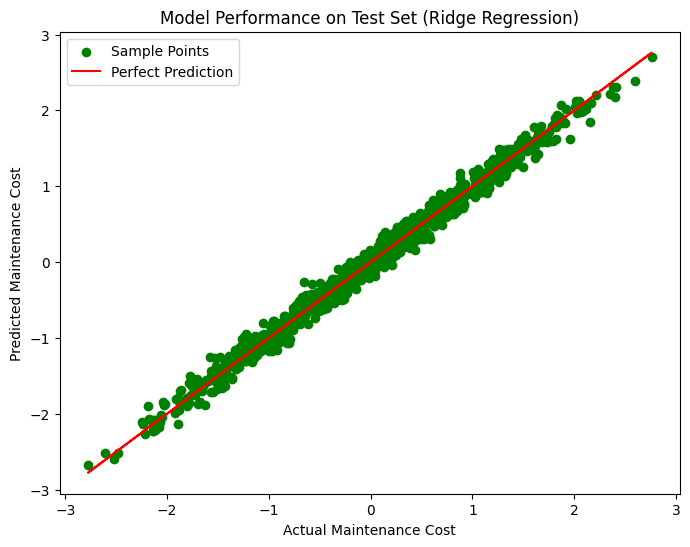

Maintenance Cost for car:  6985


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# Load dataset
df = pd.read_excel("/content/drive/MyDrive/Project/car_dataset.xlsx")

# Define features and target variable
X = df.drop("Maintenance Cost", axis=1)
y = df['Maintenance Cost']

# Convert categorical features using LabelEncoder
le = LabelEncoder()
categorical_cols = X.select_dtypes(include='object').columns
X[categorical_cols] = X[categorical_cols].apply(le.fit_transform)

# Apply scaling to features and target variable
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = StandardScaler().fit_transform(y.values.reshape(-1, 1)).flatten()  #check

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=104, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=104, shuffle=True)

# Create the pipeline with polynomial features, and Ridge model
pipeline = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', Ridge())
])

# Define the parameter grid for Ridge Regression
param_grid = {
    'alpha': [1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Train the model on the training set with the best parameters
pipeline = grid_search.best_estimator_

# Make predictions on the validation and test sets
y_pred_val = pipeline.predict(X_val)
y_pred_test = pipeline.predict(X_test)

# Evaluate on validation set
print('Validation Set Performance:')
print('Mean squared error: ', mean_squared_error(y_val, y_pred_val))
print('Coefficient of determination: ', r2_score(y_val, y_pred_val))
print('Mean absolute error: ', mean_absolute_error(y_val, y_pred_val))
print('Root Mean Squared error : ', np.sqrt(mean_squared_error(y_val, y_pred_val)))

# Evaluate on test set
print('Test Set Performance:')
print('Mean squared error: ', mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination: ', r2_score(y_test, y_pred_test))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared error : ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

# Plot actual vs. predicted for validation set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='green', label='Sample Points')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')
plt.xlabel('Actual Maintenance Cost')
plt.ylabel('Predicted Maintenance Cost')
plt.title('Model Performance on Test Set (Ridge Regression)')
plt.legend()
plt.show()

# Prediction for a new car
predx = pd.DataFrame({
    'Car Make': ["audi"],
    'Car Model': ["accord"],
    'Year of Manufacture': [2014],
    'Engine Size': [2],
    'Mileage': [10000],
    'Maintenance History': ["fuel filter"],
    'Repair Costs': [15000],
    'Insurance Premium': [10000],
    'Coverage Type': ["third-party"],
    'Location': ["india"],
    'Driver Age': [64],
    'Driver Experience': [10],
    'Safety Feature': ["tire pressure monitoring system"],
    'Vehicle Condition': ["good"]
})

# Convert categorical features using LabelEncoder
cols = predx.select_dtypes(include='object').columns
predx[cols] = predx[cols].apply(le.fit_transform)

# Apply scaling to features
predx = scaler.transform(predx)

# Predict maintenance cost
predicted_cost = pipeline.predict(predx)
print("Maintenance Cost for car: ", (predicted_cost[0] * 1000).astype(int))

### Lasso Regression

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Validation Set Performance:
Mean squared error:  0.01168467554045412
Coefficient of determination:  0.9887208840016778
Mean absolute error:  0.08753512279311867
Root Mean Squared error :  0.10809567771402388
Test Set Performance:
Mean squared error:  0.011423413310817645
Coefficient of determination:  0.9886164755712215
Mean absolute error:  0.08622002733785517
Root Mean Squared error :  0.1068803691555079


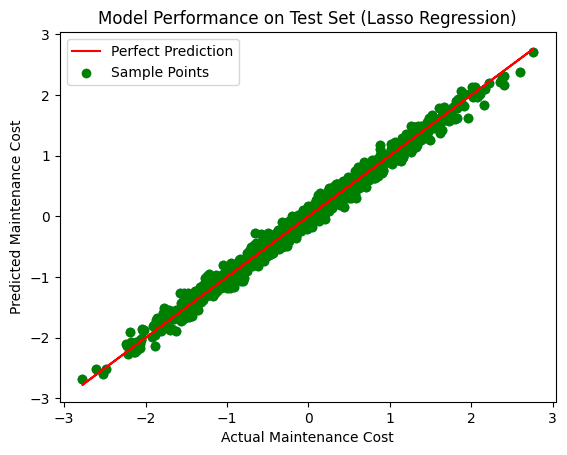

Maintenance Cost for car:  [6985]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures , StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Load dataset
df = pd.read_excel("/content/drive/MyDrive/Project/car_dataset.xlsx")
X = df.drop('Maintenance Cost',axis=1)
y = df['Maintenance Cost']

# Convert categorical features using LabelEncoder
le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
  X[col] = le.fit_transform(X[col])

# Choose and apply scaling to features (optional)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = StandardScaler().fit_transform(y.values.reshape(-1, 1))

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=104, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=104, shuffle=True)

# Create the pipeline with polynomial features, and Ridge model
pipeline = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', Lasso())
])

# Define the parameter grid for Ridge Regression
param_grid = {
    'alpha': [1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Train the model on the training set with the best parameters
pipeline = grid_search.best_estimator_

# Make predictions on the validation and test sets
y_pred_val = pipeline.predict(X_val)
y_pred_test = pipeline.predict(X_test)

# Evaluate on validation set
print('Validation Set Performance:')
print('Mean squared error: ', mean_squared_error(y_val, y_pred_val))
print('Coefficient of determination: ', r2_score(y_val, y_pred_val))
print('Mean absolute error: ', mean_absolute_error(y_val, y_pred_val))
print('Root Mean Squared error : ', np.sqrt(mean_squared_error(y_val, y_pred_val)))

# Evaluate on test set
print('Test Set Performance:')
print('Mean squared error: ', mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination: ', r2_score(y_test, y_pred_test))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared error : ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

# Plot actual vs. predicted for validation set
plt.scatter(y_test , y_pred_test)
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')
plt.scatter(y_test, y_pred_test, color='green', label='Sample Points')
plt.xlabel('Actual Maintenance Cost')
plt.ylabel('Predicted Maintenance Cost')
plt.title('Model Performance on Test Set (Lasso Regression)')
plt.legend()
plt.show()

# Prediction for a new car
predx = pd.DataFrame({
    'Car Make': ["audi"],
    'Car Model': ["accord"],
    'Year of Manufacture': [2014],
    'Engine Size': [2],
    'Mileage': [10000],
    'Maintenance History': ["fuel filter"],
    'Repair Costs': [15000],
    'Insurance Premium': [10000],
    'Coverage Type': ["third-party"],
    'Location': ["india"],
    'Driver Age': [64],
    'Driver Experience': [10],
    'Safety Feature': ["tire pressure monitoring system"],
    'Vehicle Condition': ["good"]
})

# Convert categorical features using LabelEncoder
cols = predx.select_dtypes(include='object').columns
predx[cols] = predx[cols].apply(le.fit_transform)

# Apply scaling to features
predx = scaler.transform(predx)

# Predict maintenance cost
predicted_cost = pipeline.predict(predx)
print("Maintenance Cost for car: ", (predicted_cost[0] * 1000).astype(int))


# Below is the link to our practice Colab notebook.
* Link :- https://colab.research.google.com/drive/1i5L4PyANNlif6DLD6Wt5EgQzdGwe491Q?usp=sharing